
## Author : Braham Parkash
## Data Science & Business Analytics Internship
##  GRIP - The Spark Foundation
##  TASK 3 - Perform ‘Exploratory Data Analysis’ on SampleSuperstore dataset
##  Objective :
##  1. As a business manager, try to find out the weak areas where you can work to make more profit.
##  2.What all business problems you can derive by exploring the data?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('SampleSuperstore.csv')

In [3]:
data.head()

Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region         Category Sub-Category     Sales  Quantity  \
0        42420  South        Furniture    Bookcases  261.9600         2   
1        42420  South        Furniture       Chairs  731.9400         3   
2        90036   West  Office Supplies       Labels   14.6200         2   
3        33311  South        Furniture       Tables  957.5775         5   
4        33311  South  Office Supplies      Storage   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164

In [4]:
print('Data has {} number of rows and {} columns'.format(data.shape[0],data.shape[1]))

Data has 9994 number of rows and 13 columns


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
Ship Mode       9994 non-null object
Segment         9994 non-null object
Country         9994 non-null object
City            9994 non-null object
State           9994 non-null object
Postal Code     9994 non-null int64
Region          9994 non-null object
Category        9994 non-null object
Sub-Category    9994 non-null object
Sales           9994 non-null float64
Quantity        9994 non-null int64
Discount        9994 non-null float64
Profit          9994 non-null float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
data.describe()

Postal Code         Sales     Quantity     Discount       Profit
count   9994.000000   9994.000000  9994.000000  9994.000000  9994.000000
mean   55190.379428    229.858001     3.789574     0.156203    28.656896
std    32063.693350    623.245101     2.225110     0.206452   234.260108
min     1040.000000      0.444000     1.000000     0.000000 -6599.978000
25%    23223.000000     17.280000     2.000000     0.000000     1.728750
50%    56430.500000     54.490000     3.000000     0.200000     8.666500
75%    90008.000000    209.940000     5.000000     0.200000    29.364000
max    99301.000000  22638.480000    14.000000     0.800000  8399.976000

In [7]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [8]:
data.duplicated().sum()

17

In [9]:
data.drop_duplicates(inplace=True)

In [10]:
data.shape

(9977, 13)

## What are total Sales and Profits of the company?

In [11]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [12]:
data.Country.unique()

array(['United States'], dtype=object)

In [13]:
sales = data['Sales'].sum()
profit = data['Profit'].sum()
print("Total sales in US is",sales)
print("Total profit in US is",profit)

Total sales in US is 2296195.5903
Total profit in US is 286241.4226


Top 10 States by Sales and Profits

In [14]:
data.groupby('State')['Sales'].sum().nlargest(10)

State
California      457576.2715
New York        310827.1510
Texas           170124.5418
Washington      138560.8100
Pennsylvania    116496.3620
Florida          89473.7080
Illinois         80162.5370
Ohio             77976.7640
Michigan         75879.6440
Virginia         70636.7200
Name: Sales, dtype: float64

In [15]:
data.groupby('State')['Profit'].sum().nlargest(10)

State
California    76330.7891
New York      74015.4622
Washington    33368.2375
Michigan      24428.0903
Virginia      18597.9504
Indiana       18382.9363
Georgia       16250.0433
Kentucky      11199.6966
Minnesota     10823.1874
Delaware       9977.3748
Name: Profit, dtype: float64

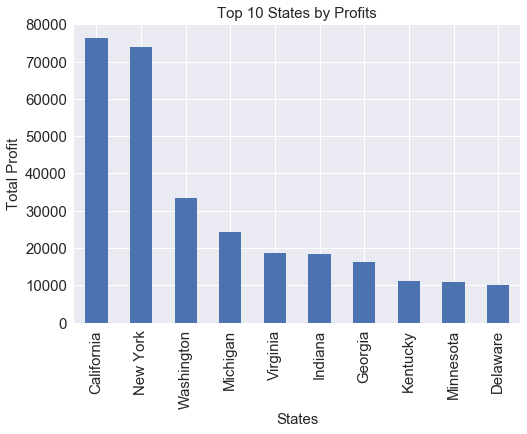

In [37]:
plt.style.use('seaborn')
data.groupby('State')['Profit'].sum().nlargest(10).plot(kind='bar',fontsize=15)
plt.ylabel('Total Profit',fontsize=15)
plt.xlabel("States", fontsize =15)
plt.title('Top 10 States by Profits',fontsize=15)
plt.show()


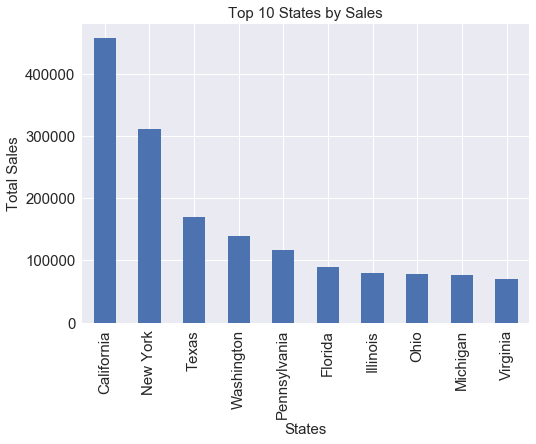

In [38]:
plt.style.use('seaborn')
data.groupby('State')['Sales'].sum().nlargest(10).plot(kind='bar',fontsize=15)
plt.ylabel('Total Sales',fontsize=15)
plt.xlabel("States", fontsize =15)
plt.title('Top 10 States by Sales',fontsize=15)
plt.show()


Correlation Heatmap

In [18]:
data.corr()

Postal Code     Sales  Quantity  Discount    Profit
Postal Code     1.000000 -0.023476  0.013110  0.059225 -0.029892
Sales          -0.023476  1.000000  0.200722 -0.028311  0.479067
Quantity        0.013110  0.200722  1.000000  0.008678  0.066211
Discount        0.059225 -0.028311  0.008678  1.000000 -0.219662
Profit         -0.029892  0.479067  0.066211 -0.219662  1.000000

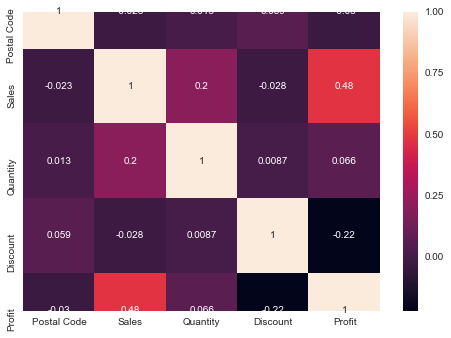

In [19]:
sns.heatmap(data.corr(),annot=True,fmt='.2g')

* From Above map we infer that -:

  * Sales and profits are positively correlated    
  * Discount and Profits are Negatively correlated

In [20]:
data_num=data.select_dtypes(include=[np.number])
data_num

Postal Code     Sales  Quantity  Discount    Profit
0           42420  261.9600         2      0.00   41.9136
1           42420  731.9400         3      0.00  219.5820
2           90036   14.6200         2      0.00    6.8714
3           33311  957.5775         5      0.45 -383.0310
4           33311   22.3680         2      0.20    2.5164
...           ...       ...       ...       ...       ...
9989        33180   25.2480         3      0.20    4.1028
9990        92627   91.9600         2      0.00   15.6332
9991        92627  258.5760         2      0.20   19.3932
9992        92627   29.6000         4      0.00   13.3200
9993        92683  243.1600         2      0.00   72.9480

[9977 rows x 5 columns]

EDA using Plotly

In [24]:
from plotly import __version__
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot, iplot

init_notebook_mode(connected=True)
import plotly.io as pio
pio.renderers.default = 'colab'

cf.go_offline()
import plotly.offline as pyo
import plotly.graph_objs as go
# Set notebook mode to work in offline
pyo.init_notebook_mode()

In [25]:
data.head(2)

Ship Mode   Segment        Country       City     State  Postal Code  \
0  Second Class  Consumer  United States  Henderson  Kentucky        42420   
1  Second Class  Consumer  United States  Henderson  Kentucky        42420   

  Region   Category Sub-Category   Sales  Quantity  Discount    Profit  
0  South  Furniture    Bookcases  261.96         2       0.0   41.9136  
1  South  Furniture       Chairs  731.94         3       0.0  219.5820

In [26]:
for col in data.columns:
  print('Number of unique values in {} are : {} '.format(col,data[str(col)].nunique()))

Number of unique values in Ship Mode are : 4 
Number of unique values in Segment are : 3 
Number of unique values in Country are : 1 
Number of unique values in City are : 531 
Number of unique values in State are : 49 
Number of unique values in Postal Code are : 631 
Number of unique values in Region are : 4 
Number of unique values in Category are : 3 
Number of unique values in Sub-Category are : 17 
Number of unique values in Sales are : 5825 
Number of unique values in Quantity are : 14 
Number of unique values in Discount are : 12 
Number of unique values in Profit are : 7287 


In [27]:
data.Discount.value_counts()

0.00    4787
0.20    3653
0.70     418
0.80     299
0.30     226
0.40     206
0.60     138
0.10      94
0.50      66
0.15      52
0.32      27
0.45      11
Name: Discount, dtype: int64

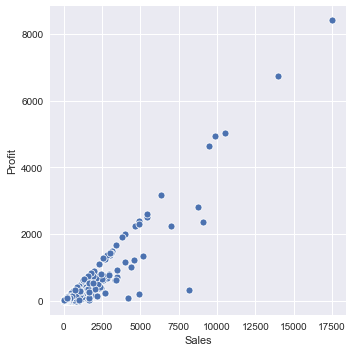

In [28]:
d_disc=data[data.Discount==0]
sns.relplot(  x='Sales',y='Profit',data=d_disc)

In [29]:
data.iplot(x="Discount", y="Sales",kind='bar',title='Discount VS Sales',xTitle='Discount',yTitle='Sales') #visualisatn

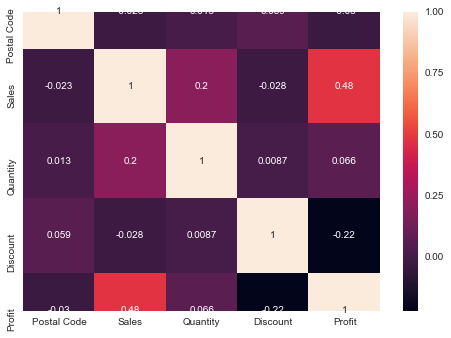

In [30]:
correlation=data.corr()
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)

There is more discount at 0   
Hence we say that in above 2 graphs having 0 discount there positive relation between Profit and sales. Now we plot heat_map to get correlaton

Hence, we see that There is strong correlation between sales and Profit i.e 0.92

In [31]:
pd.crosstab(index=data['Category'],columns='count')

col_0            count
Category              
Furniture         2118
Office Supplies   6012
Technology        1847

In [32]:
pd.crosstab(index=data['Segment'],columns='count')

col_0        count
Segment           
Consumer      5183
Corporate     3015
Home Office   1779

In [33]:
pd.crosstab(index=data['Sub-Category'],columns='count')

col_0         count
Sub-Category       
Accessories     775
Appliances      466
Art             795
Binders        1522
Bookcases       228
Chairs          615
Copiers          68
Envelopes       254
Fasteners       217
Furnishings     956
Labels          363
Machines        115
Paper          1359
Phones          889
Storage         846
Supplies        190
Tables          319

In [34]:
pd.crosstab(index=data['Ship Mode'],columns='count')

col_0           count
Ship Mode            
First Class      1537
Same Day          542
Second Class     1943
Standard Class   5955

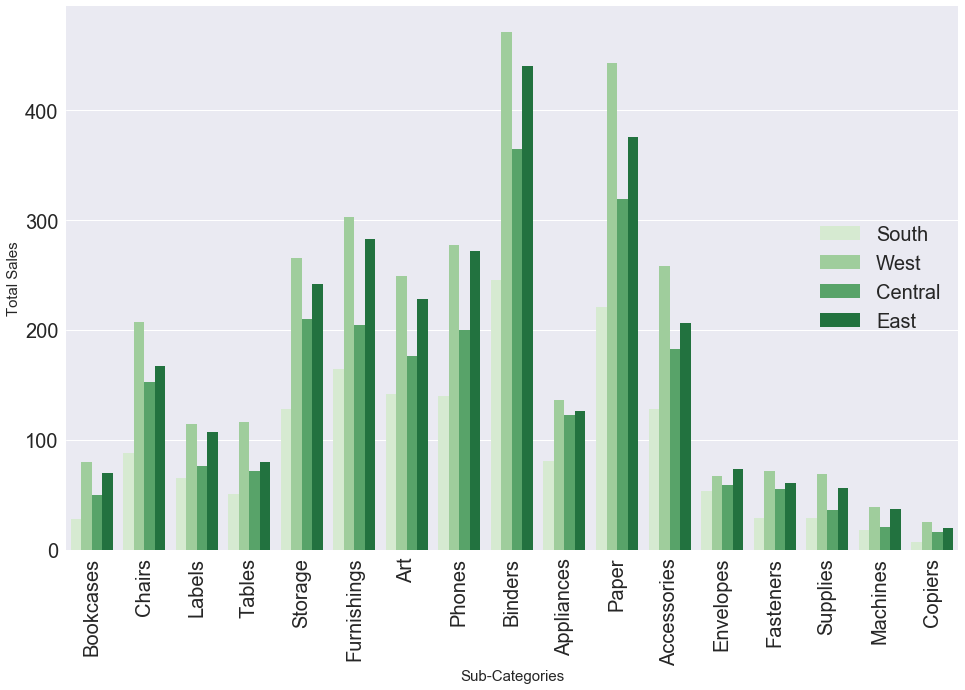

In [41]:
plt.figure(figsize=(16,10))
sns.countplot(x='Sub-Category',hue='Region',data=data,palette='Greens')
plt.xlabel('Sub-Categories',fontsize = 15)
plt.legend(loc=5,fontsize=20)
plt.ylabel('Total Sales',fontsize=15)
plt.xticks(rotation=90,fontsize=20)
plt.yticks(fontsize=20)
plt.show()

* Here west and east have high no of sub category

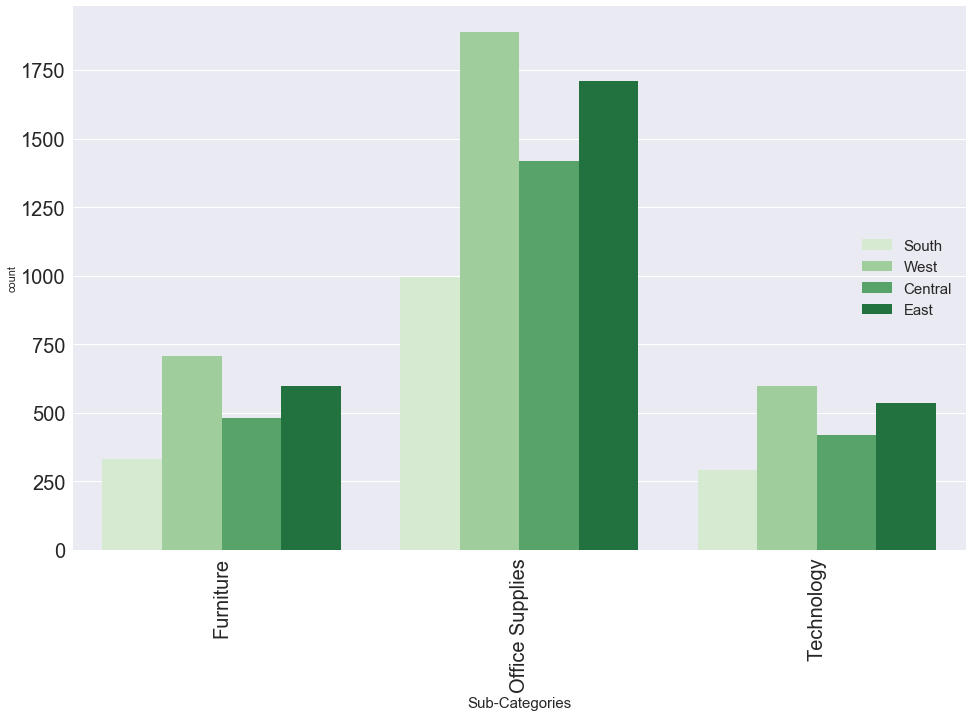

In [43]:
plt.figure(figsize=(16,10))
sns.countplot(x='Category',hue='Region',data=data,palette='Greens')
plt.xlabel('Sub-Categories',fontsize = 15)
plt.legend(loc=5,fontsize=15)
plt.xticks(rotation=90,fontsize=20)
plt.yticks(fontsize=20)
plt.show()

* From the above count plot, we can conclude that people residing in the west region order more as compared to other regions

#Data count by category

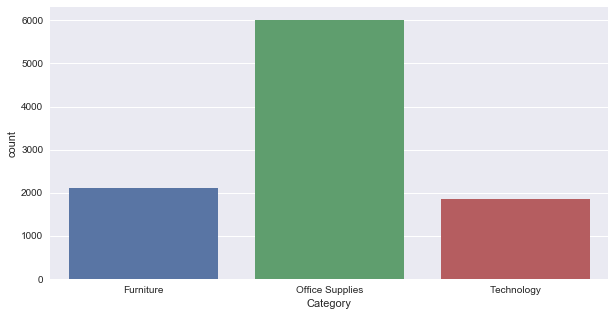

In [44]:
plt.figure(figsize=(10,5))
sns.countplot(data.Category)

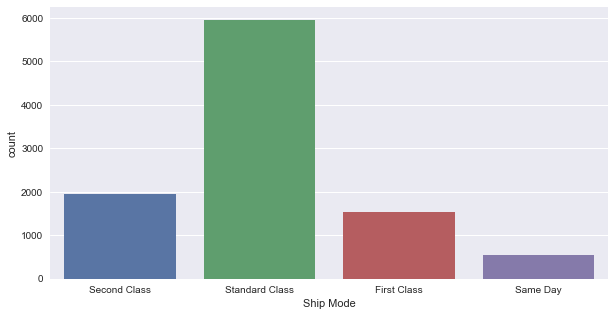

In [45]:
plt.figure(figsize=(10,5))
sns.countplot(data['Ship Mode'])

* Standard class is preferred as compared to other modes

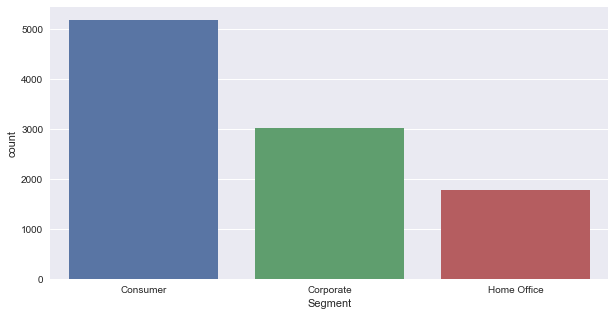

In [46]:
plt.figure(figsize=(10,5))
sns.countplot(data['Segment'])


* Consumer is more in all Segments and Home office is less in all Segment

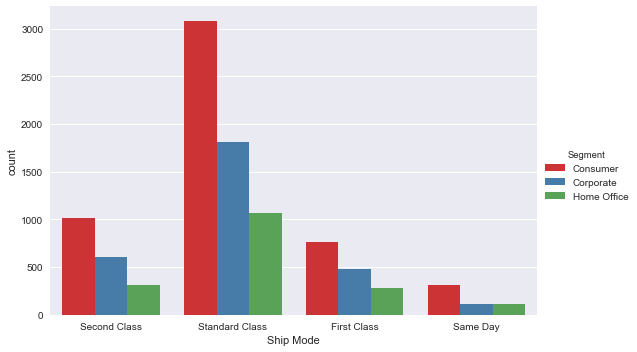

In [47]:
sns.catplot(hue='Segment',x='Ship Mode',data=data,kind='count',aspect=1.5, palette="Set1")

Number of consumers for every ship mode is higher as compared to other segments.

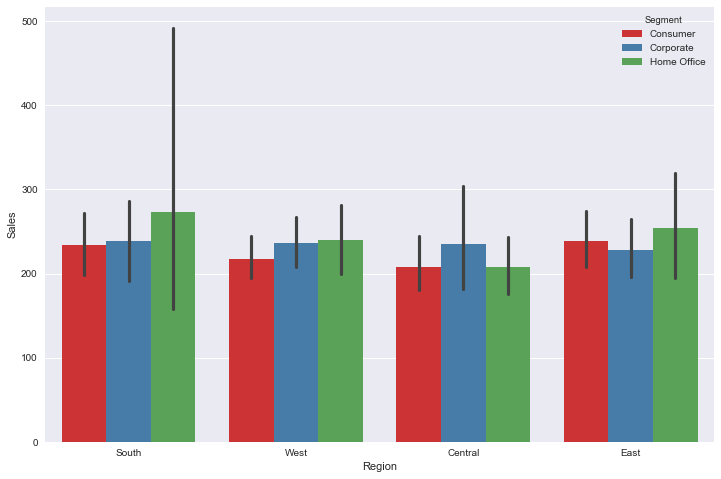

In [48]:
plt.figure(figsize=[12,8])
sns.barplot(x='Region',y='Sales',hue='Segment',data=data, palette="Set1")

* This Graph shows tells that all are equal atmost but Home Office is greater in all except central Region


In [50]:
top_20cities=data.City.value_counts()[:20]
top_20cities

New York City    914
Los Angeles      746
Philadelphia     536
San Francisco    506
Seattle          424
Houston          375
Chicago          313
Columbus         221
San Diego        170
Springfield      163
Dallas           157
Jacksonville     125
Detroit          114
Newark            95
Richmond          90
Jackson           82
Columbia          81
Aurora            68
Phoenix           63
Long Beach        61
Name: City, dtype: int64

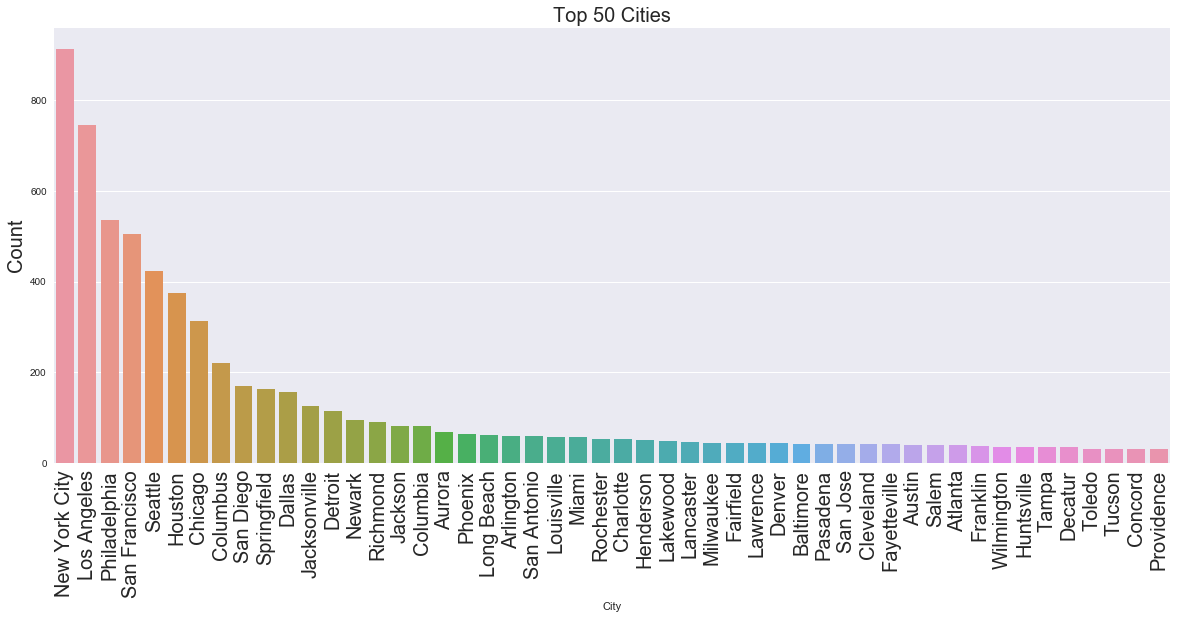

In [51]:
plt.figure(figsize=(20,8))
sns.countplot(x=data['City'],order=data.City.value_counts()[:50].index)
plt.title('Top 50 Cities',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=90,fontsize=20)
plt.show()

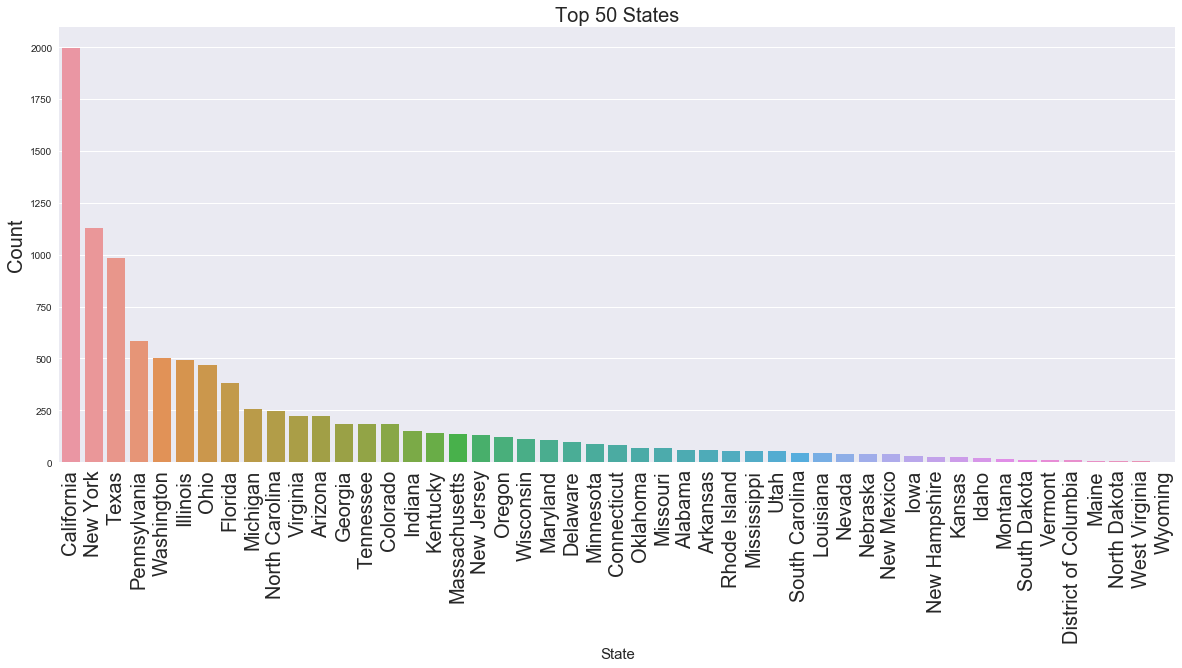

In [52]:
plt.figure(figsize=(20,8))
sns.countplot(x=data['State'],order=data.State.value_counts()[:50].index)
plt.title('Top 50 States',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xlabel('State',fontsize=15)
plt.xticks(rotation=90,fontsize=20)
plt.show()

##Sales by category and Sub - category

In [ ]:
data.head()

Ship Mode    Segment        Country  ... Quantity Discount    Profit
0    Second Class   Consumer  United States  ...        2     0.00   41.9136
1    Second Class   Consumer  United States  ...        3     0.00  219.5820
2    Second Class  Corporate  United States  ...        2     0.00    6.8714
3  Standard Class   Consumer  United States  ...        5     0.45 -383.0310
4  Standard Class   Consumer  United States  ...        2     0.20    2.5164

[5 rows x 13 columns]

In [ ]:
data.groupby('Category')['Sales'].sum()

Category
Furniture          741999.7953
Office Supplies    719047.0320
Technology         836154.0330
Name: Sales, dtype: float64

In [62]:
data.iplot(x="Category", y="Sales",kind='bar',colors='yellow',
         title='Category VS Sales',xTitle='Category',yTitle='Sales',)

Text(0, 0.5, 'Sales')

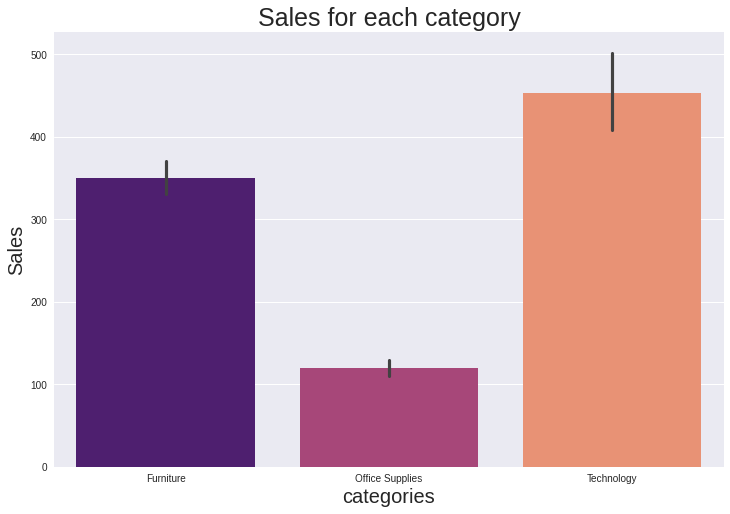

In [ ]:
plt.figure(figsize=[12,8])
ax=sns.barplot(x='Category',y='Sales',data=data,palette='magma')
plt.title('Sales for each category',fontsize=25)
plt.xlabel("categories",fontsize=20)
plt.ylabel("Sales",fontsize=20)

Observation:       
Sales are more in Technology  and less in Office

In [53]:
data.groupby('Sub-Category')['Sales'].sum()

Sub-Category
Accessories    167380.3180
Appliances     107532.1610
Art             27107.0320
Binders        203409.1690
Bookcases      114879.9963
Chairs         327777.7610
Copiers        149528.0300
Envelopes       16476.4020
Fasteners        3024.2800
Furnishings     91683.0240
Labels          12444.9120
Machines       189238.6310
Paper           78224.1420
Phones         330007.0540
Storage        223843.6080
Supplies        46673.5380
Tables         206965.5320
Name: Sales, dtype: float64

In [55]:
data.iplot(x="Sub-Category", y="Sales",kind='bar',colors='violet',
         title='Sub_Category VS Sales',xTitle='Sub_Category',yTitle='Sales')

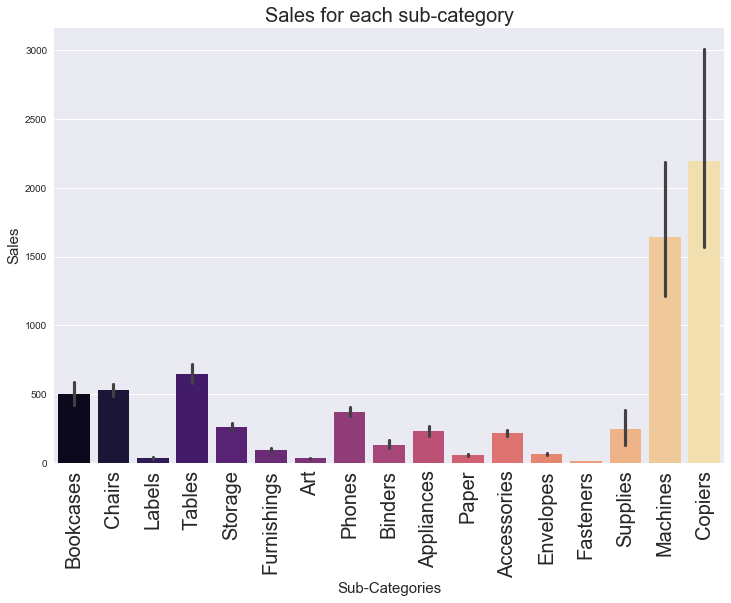

In [56]:
plt.figure(figsize=[12,8])
ax=sns.barplot(x='Sub-Category',y='Sales',data=data,palette='magma')
plt.xlabel("Sub-Categories",fontsize=15)
plt.title('Sales for each sub-category',fontsize=20)
plt.ylabel("Sales",fontsize=15)
plt.xticks(rotation=90,fontsize=20)
plt.show()

More in Copiers and Machines as compared to others

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

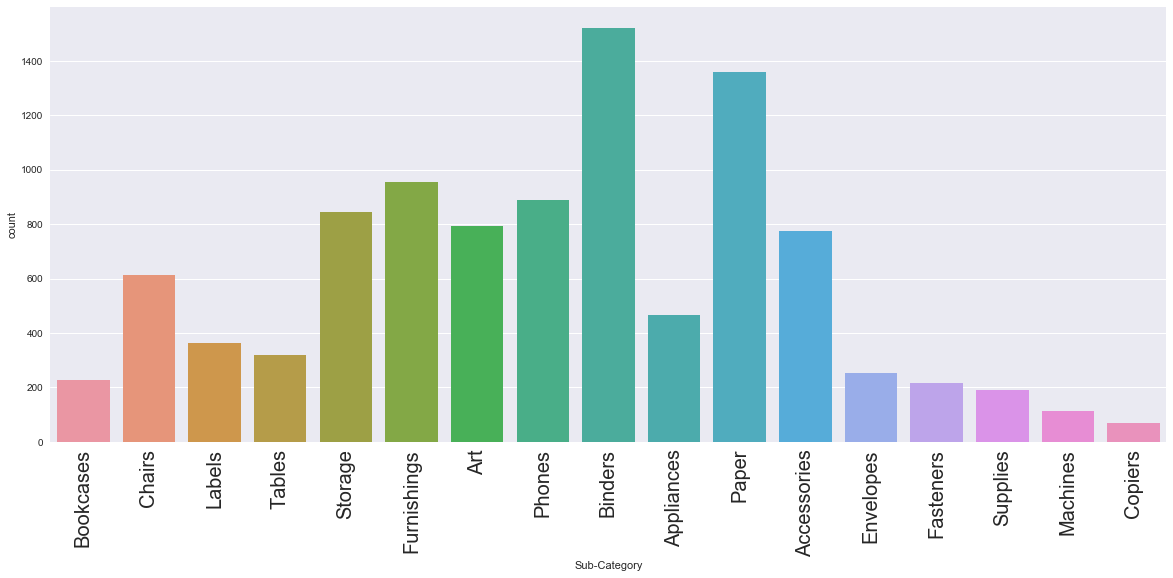

In [57]:
plt.figure(figsize=(20,8))
sns.countplot(x=data['Sub-Category'])
plt.xticks(rotation=90,fontsize=20)

Accessories    167380.3180   
Appliances     107532.1610   
Art             27118.7920    
Binders        203412.7330    
Bookcases      114879.9963

## Profit by sub-category and Category

In [58]:
data.iplot(x="Sub-Category", y="Profit",kind='bar',title='Sub-Category VS Profit',xTitle='Sub-Category',yTitle='Profit',color='red') #visualisation 

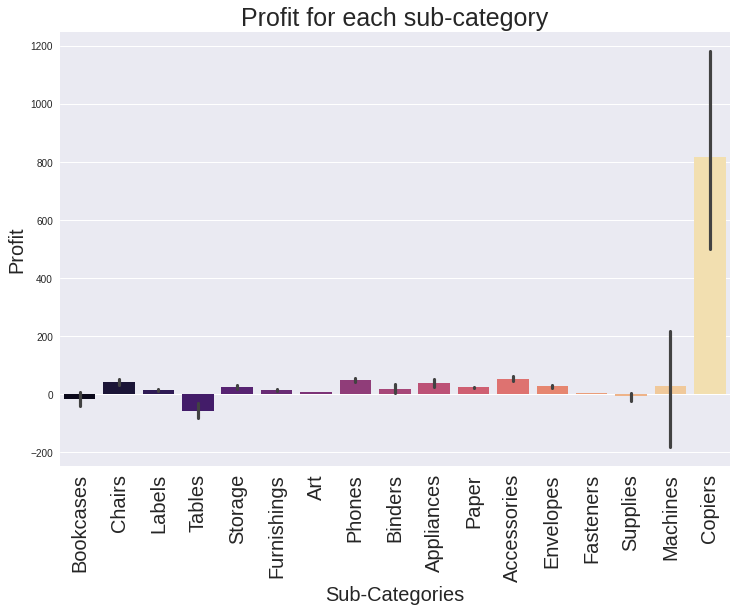

In [ ]:
plt.figure(figsize=[12,8])
ax=sns.barplot(x='Sub-Category',y='Profit',data=data,palette='magma')
plt.xlabel("Sub-Categories",fontsize=20)
plt.title('Profit for each sub-category',fontsize=25)
plt.ylabel("Profit",fontsize=20)
plt.xticks(rotation=90,fontsize=20)
plt.show()

In [59]:
data.iplot(x="Category", y="Profit",kind='bar',title='Category VS Profit',xTitle='Category',yTitle='Profit',color='red') #visualisation

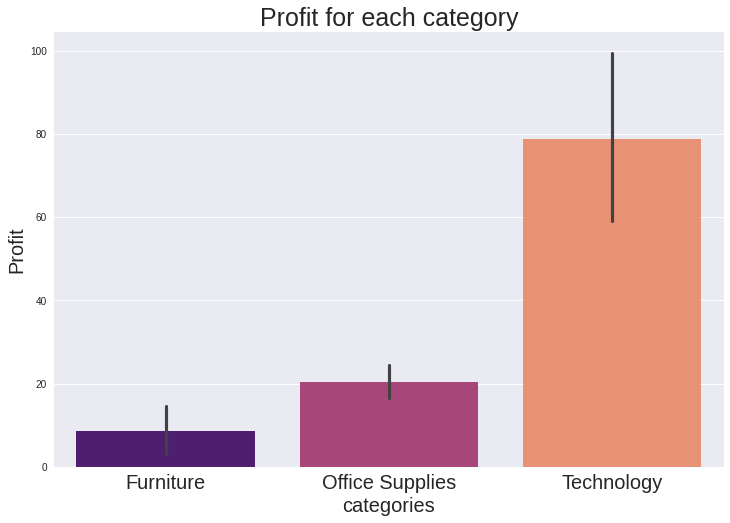

In [ ]:
plt.figure(figsize=[12,8])
ax=sns.barplot(x='Category',y='Profit',data=data,palette='magma')
plt.title('Profit for each category',fontsize=25)
plt.xlabel("categories",fontsize=20)
plt.ylabel("Profit",fontsize=20)
plt.xticks(fontsize=20)
plt.show()

Technology gives you more profit and Furniture gives you more loss

## States VS Profit

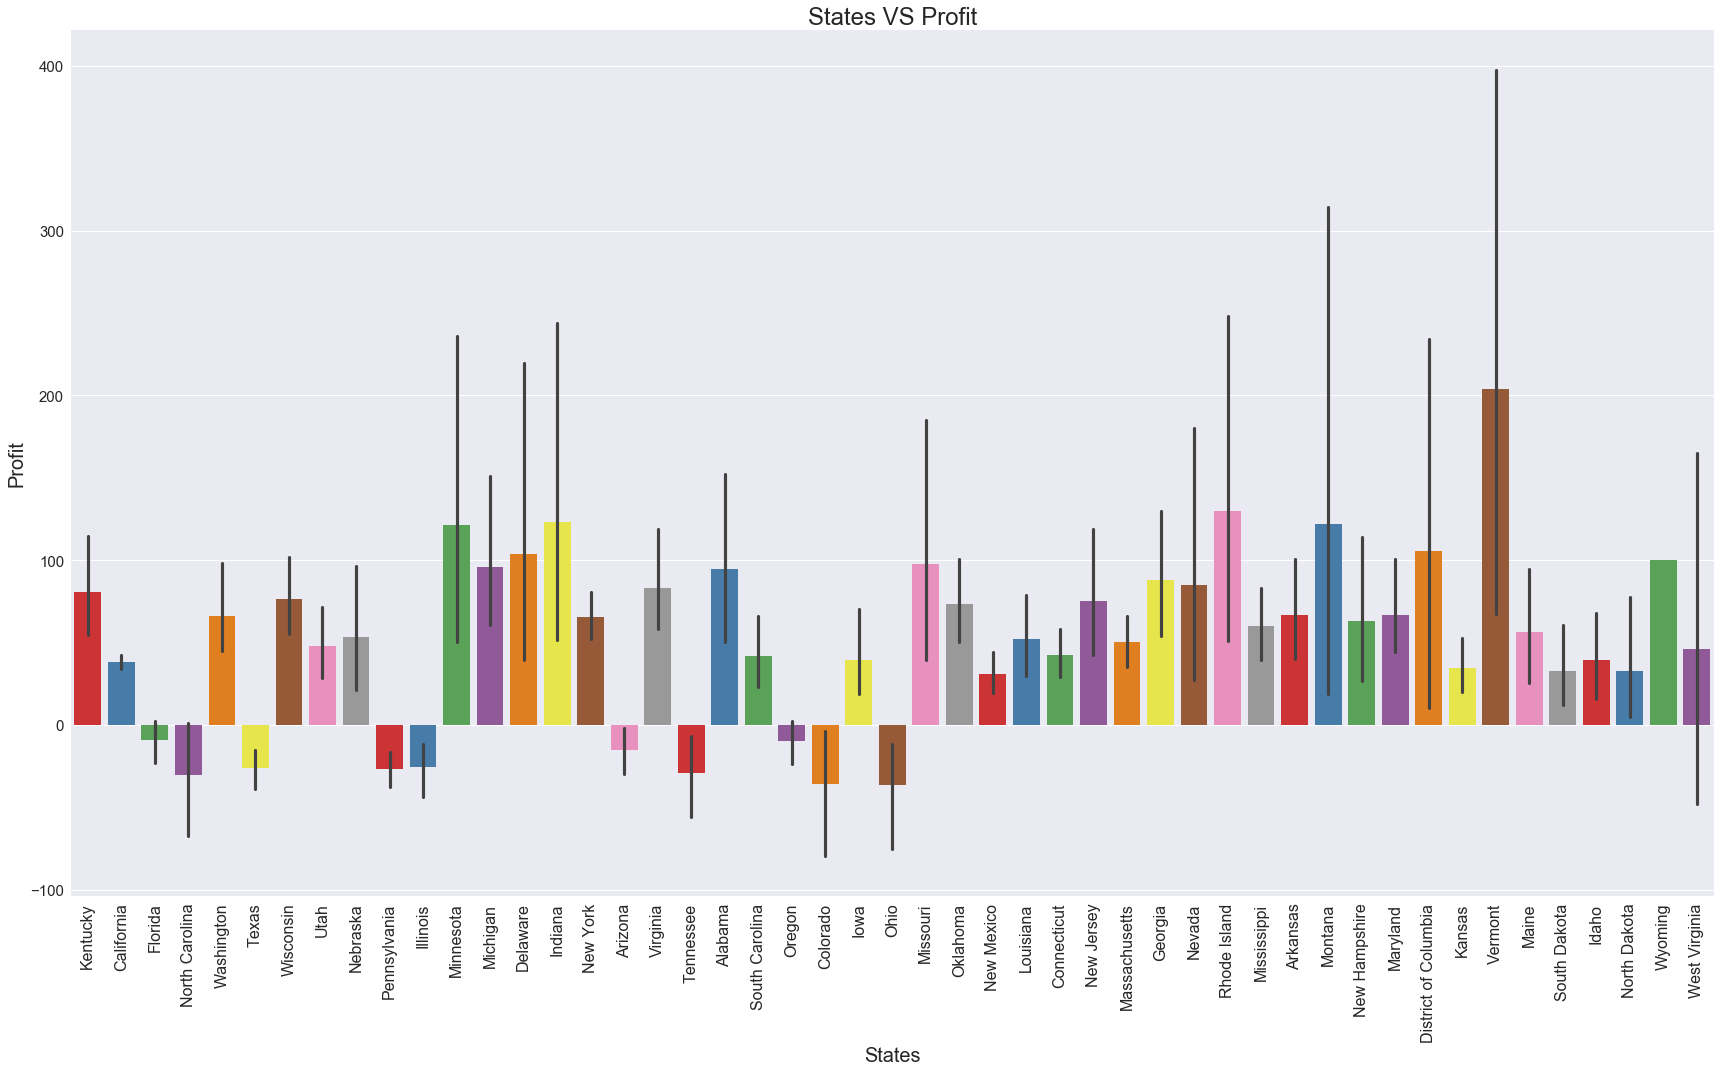

In [60]:

plt.figure(figsize=[24,15])
ax = sns.barplot(x="State", y="Profit", data=data, palette="Set1")
plt.xticks(rotation=90, fontsize=16)
plt.yticks(fontsize=15)
plt.title("States VS Profit",fontsize=24)
plt.xlabel("States",fontsize=20)
plt.ylabel("Profit",fontsize=20)
plt.tight_layout()


States with more loss are Ohio , Texas , Illinos , Minnesota , Tennessee , Arizona , Pennsylvania

In [61]:

data.iplot(x="State", y="Profit",kind='bar',title='State VS Profit',xTitle='State',yTitle='Profit',color='red') #visualisation

In [ ]:
pivot1=pd.pivot_table(data,index='Sub-Category',values='Discount')
pivot1

Discount
Sub-Category          
Accessories   0.078452
Appliances    0.166524
Art           0.074874
Binders       0.372292
Bookcases     0.211140
Chairs        0.170178
Copiers       0.161765
Envelopes     0.080315
Fasteners     0.082028
Furnishings   0.138349
Labels        0.068681
Machines      0.306087
Paper         0.074891
Phones        0.154556
Storage       0.074704
Supplies      0.076842
Tables        0.261285

Discount
Category                 
Furniture        0.173923
Office Supplies  0.157285
Technology       0.132323

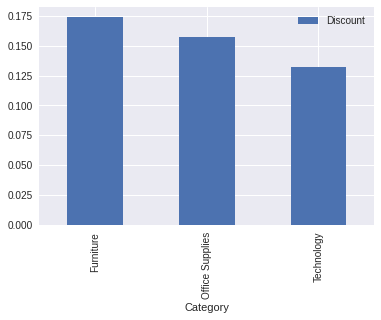

In [ ]:
pivot=pd.pivot_table(data,index='Category',values='Discount')
pivot.plot(kind='bar')
pivot

There is more discount in Furnitures